Import libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

Define foursqaure credentials and version

In [2]:
CLIENT_ID = 'WUHKQBBEMTA2WHQV2KYGEL1QIHY1WDMBO1EU23VFXU1CQFSB' # your Foursquare ID
CLIENT_SECRET = 'MB2DARGXQHGMJ4032B4E04YF2KKHJN3GH4ZIEEMOWX2I04BO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WUHKQBBEMTA2WHQV2KYGEL1QIHY1WDMBO1EU23VFXU1CQFSB
CLIENT_SECRET:MB2DARGXQHGMJ4032B4E04YF2KKHJN3GH4ZIEEMOWX2I04BO


In [3]:
address = 'Orchard Rd, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.3037478 103.8342469


Search for offices building in Singapore

In [4]:
search_query = 'Offices'
radius = 20000 
print(search_query + ' .... OK!')

Offices .... OK!


Define corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WUHKQBBEMTA2WHQV2KYGEL1QIHY1WDMBO1EU23VFXU1CQFSB&client_secret=MB2DARGXQHGMJ4032B4E04YF2KKHJN3GH4ZIEEMOWX2I04BO&ll=1.3037478,103.8342469&v=20180604&query=Offices&radius=20000&limit=500'

Send the GET request and examine the results

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e6e39950be7b4001bd154ae'},
 'response': {'venues': [{'id': '4ca535a68a65bfb7c46e2b22',
    'name': 'Offices @ Orchard Rendezvous Hotel',
    'location': {'address': 'Orchard Rendezvous Hotel',
     'crossStreet': '1 Tanglin Road',
     'lat': 1.3070650605934975,
     'lng': 103.82753547375948,
     'labeledLatLngs': [{'label': 'display',
       'lat': 1.3070650605934975,
       'lng': 103.82753547375948}],
     'distance': 833,
     'cc': 'SG',
     'city': 'Singapore',
     'country': 'Singapore',
     'formattedAddress': ['Orchard Rendezvous Hotel (1 Tanglin Road)',
      'Singapore']},
    'categories': [{'id': '4bf58dd8d48988d124941735',
      'name': 'Office',
      'pluralName': 'Offices',
      'shortName': 'Office',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1584282007',
    'hasPerk': False},
   {'id': '4bb2b669a32876b0690401fe

Get relevant part of JSON and transform it into a pandas dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4ca535a68a65bfb7c46e2b22,Orchard Rendezvous Hotel,SG,Singapore,Singapore,1 Tanglin Road,833,"[Orchard Rendezvous Hotel (1 Tanglin Road), Si...","[{'label': 'display', 'lat': 1.307065060593497...",1.307065,103.827535,NaN,NaN,NaN,Offices @ Orchard Rendezvous Hotel,v-1584282007
1,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4bb2b669a32876b0690401fe,Great World City,SG,Singapore,Singapore,1 Kim Seng Promenade,1263,"[Great World City (1 Kim Seng Promenade), 2379...","[{'label': 'display', 'lat': 1.292561474840055...",1.292561,103.832309,NaN,237994,NaN,Great World City Offices,v-1584282007
2,"[{'id': '4bf58dd8d48988d174941735', 'name': 'C...",False,5b1fc1ce3fcee8002ca55eb5,"391B Orchard Road, Floor 22",SG,Orchard,Singapore,NaN,144,"[391B Orchard Road, Floor 22, 238874, Singapore]","[{'label': 'display', 'lat': 1.302631, 'lng': ...",1.302631,103.834911,NaN,238874,Singapore,The Great Room Offices,v-1584282007
3,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,54a60a3d498ea5a445fa057a,NaN,SG,NaN,Singapore,NaN,190,[Singapore],"[{'label': 'display', 'lat': 1.302248477935791...",1.302248,103.835068,NaN,NaN,NaN,Ngee Ann City Tower A Offices,v-1584282007
4,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",False,4cf095a76195721e1a9d3cc1,NaN,SG,NaN,Singapore,NaN,270,[Singapore],"[{'label': 'display', 'lat': 1.302452916284984...",1.302453,103.836307,NaN,NaN,NaN,Corporate Serviced Offices @ Tong Building,v-1584282007


In [8]:
dataframe.shape

(50, 18)

Clean up data

In [9]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Create a map

In [10]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Offices @ Orchard Rendezvous Hotel,Office,Orchard Rendezvous Hotel,SG,Singapore,Singapore,1 Tanglin Road,833,"[Orchard Rendezvous Hotel (1 Tanglin Road), Si...","[{'label': 'display', 'lat': 1.307065060593497...",1.307065,103.827535,NaN,NaN,NaN,4ca535a68a65bfb7c46e2b22
1,Great World City Offices,Office,Great World City,SG,Singapore,Singapore,1 Kim Seng Promenade,1263,"[Great World City (1 Kim Seng Promenade), 2379...","[{'label': 'display', 'lat': 1.292561474840055...",1.292561,103.832309,NaN,237994,NaN,4bb2b669a32876b0690401fe
2,The Great Room Offices,Coworking Space,"391B Orchard Road, Floor 22",SG,Orchard,Singapore,NaN,144,"[391B Orchard Road, Floor 22, 238874, Singapore]","[{'label': 'display', 'lat': 1.302631, 'lng': ...",1.302631,103.834911,NaN,238874,Singapore,5b1fc1ce3fcee8002ca55eb5
3,Ngee Ann City Tower A Offices,Office,NaN,SG,NaN,Singapore,NaN,190,[Singapore],"[{'label': 'display', 'lat': 1.302248477935791...",1.302248,103.835068,NaN,NaN,NaN,54a60a3d498ea5a445fa057a
4,Corporate Serviced Offices @ Tong Building,Office,NaN,SG,NaN,Singapore,NaN,270,[Singapore],"[{'label': 'display', 'lat': 1.302452916284984...",1.302453,103.836307,NaN,NaN,NaN,4cf095a76195721e1a9d3cc1
5,Compass Offices | Singapore Land Tower,Coworking Space,"19/F & 30/F, Singapore Land Tower",SG,Singapore,Singapore,50 Raffles Place,2310,"[19/F & 30/F, Singapore Land Tower (50 Raffles...","[{'label': 'display', 'lat': 1.285410566864677...",1.285411,103.843964,NaN,Singapore,NaN,4f60630abb3d79729d16db88
6,Compass Offices | Prudential Tower,Coworking Space,"26/F & 27/F, Prudential Tower",SG,Singapore,Singapore,30 Cecil St,2926,"[26/F & 27/F, Prudential Tower (30 Cecil St), ...","[{'label': 'display', 'lat': 1.282632496081466...",1.282632,103.849919,NaN,Singapore,NaN,4f606201bb3d79729d16c31d
7,Cura nobis Private Limited Offices,Office,53 Cairnhill Plaza,SG,Singapore,Singapore,NaN,567,"[53 Cairnhill Plaza, 229664, Singapore]","[{'label': 'display', 'lat': 1.306991441628672...",1.306991,103.838176,NaN,229664,NaN,5185ef2d498e43b27fbff51f
8,M Services Offices (111) Pte Ltd,Office,TripleOne Somerset #07-07,SG,NaN,Singapore,NaN,596,"[TripleOne Somerset #07-07, Singapore]","[{'label': 'display', 'lat': 1.299951842627603...",1.299952,103.838028,NaN,NaN,NaN,51342e88e4b0424842969182
9,Orchard Hotel Executive Offices,Coworking Space,NaN,SG,NaN,Singapore,NaN,697,[Singapore],"[{'label': 'display', 'lat': 1.307820544408523...",1.307821,103.829480,NaN,NaN,NaN,4fea6cd5e4b03512973bd1bc


Mapout

In [11]:
# create map of New York using latitude and longitude values
map_office = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, name in zip(dataframe_filtered['lat'], dataframe_filtered['lng'], dataframe_filtered['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_office)  
    
map_office

In [12]:
Data_to_cluster=dataframe_filtered[['lat', 'lng']]


In [47]:
#cluster the data together according to distance
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(Data_to_cluster)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [48]:
k_means_labels = k_means.labels_
k_means_labels
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers


array([[  1.29782943, 103.84275948],
       [  1.32124633, 104.02001381],
       [  1.33783599, 103.75610205]])

In [44]:
Data_to_cluster_numpy=Data_to_cluster.to_numpy()

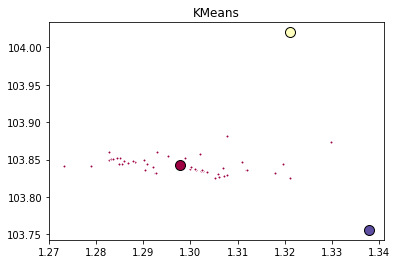

In [51]:
import matplotlib.pyplot as plt 

# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)


# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(Data_to_cluster_numpy[my_members,0], Data_to_cluster_numpy[my_members,1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=10)


# Title of the plot
ax.set_title('KMeans')



# Show the plot
plt.show()


Choose to open restaurant at red dot - lat  1.29782943, lng 103.84275948